![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Bijal Saija
***

## Overview

Microsoft has decided to create a new movie studio and requires more insight into which types of films are doing best at the box office. This project uses descriptive statistical analysis of data gathered from the IMDb website to gain insight into which combination of genres or which are the most popular genres in today's generation over the last few years. Three separate datasets were used for this analysis to gain insight into which combination genres of movies topped the total gross, had the top average ratings movie genres, and best studio's top-grossed genres. The results of the top 20 combination genres in highest-grossed movies, top rating movies, and highest-grossed movies in the last 15 years combination of Action, Adventure, and sci-fi, with adventure being present in the majority of the top 20 of the 3 categories. My recommendation for which type of Movie to produce would be Action, Adventure, or sci-fi as this is the most predominant combination in the analysis by top-grossed movies, there were 260 unique genre combinations in this data set after cleaning. I recommend that Adventure and Action paired with either Animation or Fantasy is a successful combination which I have analysed by top studio's top 10 movies. In total gross, the combination of Adventure, Animation, and comedy also faired well which would be my third recommendation. Adventure was a strong genre for popular successful movies.

## Business Problem

Microsoft wants to produce movies that are going to be successful to make profits, they want to know which types of movies are the most successful. To answer that question, domestic and Foreign Sales data was analyzed to see the most financially successful genres, along with the average rating and popularity over the years for each type or genre of movie to see how popularity compared with financial success.

## Data Understanding

In the repository there is a folder "zippeddata" which includes the following:
- imdb.title.basics
- imdb.title.ratings
- bom.movie_gross 
- tn.movie_budgets

I have used them to find insights of top recommended genres.

In [5]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [54]:
#df1=gross_df
#df4=basics_df
#df7=rating_df
#df9=budgets_df
#new_df=splitted_basics_df

#df1=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
#df4=pd.read_csv('zippedData/imdb.title.basics.csv.gz', dtype=str)
    #df4=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
#splitdf4=pd.read_csv('zippedData/imdb.title.basics.csv.gz', dtype=str)
    #df7=pd.read_csv('zippedData/imdb.title.ratings.csv.gz',dtype=str)
#df7=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
#df9=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

gross_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
basics_df=pd.read_csv('zippedData/imdb.title.basics.csv.gz', dtype=str)
#basics_df=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
split_basics_df=pd.read_csv('zippedData/imdb.title.basics.csv.gz', dtype=str)
#rating_df=pd.read_csv('zippedData/imdb.title.ratings.csv.gz',dtype=str)
rating_df=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
budgets_df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

## Data Preparation


In [55]:
#cleaned imdb.title.basics
basics_df.dropna() 

# Split the 'genres' column by comma into separate genre columns of imdb.title.basics 
split_basics_df['genres'] = split_basics_df['genres'].str.split(',')
# Explode the 'genres' column to create multiple rows for each genre
splitted_basics_df = split_basics_df.explode('genres')
# Reset the index of the new DataFrame
splitted_basics_df.reset_index(drop=True, inplace=True)
# Remove rows with NaN values from the DataFrame
splitted_basics_df = splitted_basics_df.dropna()
# Reset the index of the new DataFrame
splitted_basics_df.reset_index(drop=True, inplace=True)

#merge 2 datasets new splitted_basics_df(imdb.title.basics with splited genres) and rating_df(imdb.title.ratings)
inner_merge=pd.merge(splitted_basics_df,rating_df,on='tconst')
combo_inner_merge = pd.merge(basics_df,rating_df,on='tconst')
#clean the merged data
inner_merge.dropna()
combo_inner_merge.dropna()



,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


## Data Modeling

In [56]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [57]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [58]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [59]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [60]:
gross_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [61]:
basics_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [62]:
rating_df.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [63]:
budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [64]:
gross_df['studio'].value_counts()

IFC        166
Uni.       147
WB         140
Magn.      136
Fox        136
          ... 
Crimson      1
Jampa        1
UHE          1
EF           1
ALP          1
Name: studio, Length: 257, dtype: int64

In [65]:
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [66]:
print(splitted_basics_df)
splitted_basics_df.head()

           tconst                                      primary_title  \
0       tt0063540                                          Sunghursh   
1       tt0063540                                          Sunghursh   
2       tt0063540                                          Sunghursh   
3       tt0066787                    One Day Before the Rainy Season   
4       tt0066787                    One Day Before the Rainy Season   
...           ...                                                ...   
193726  tt9916170                                      The Rehearsal   
193727  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
193728  tt9916190                                          Safeguard   
193729  tt9916190                                          Safeguard   
193730  tt9916538                                Kuambil Lagi Hatiku   

                                           original_title start_year  \
0                                               Sunghursh      

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,Drama


## Evaluation


Text(0, 0.5, 'Average Rating')

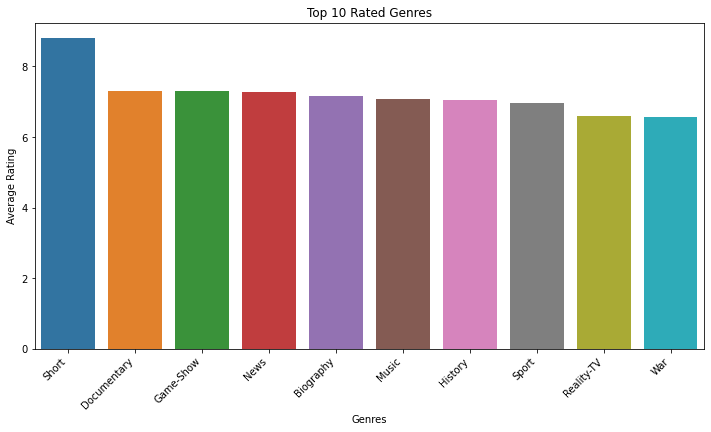

In [67]:
inner_merge['averagerating'] = pd.to_numeric(inner_merge['averagerating'], errors='coerce')
mean_df = inner_merge.groupby('genres')['averagerating'].mean().reset_index().sort_values(by='averagerating', ascending=False)
top10_rating = mean_df.nlargest(10, 'averagerating')
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=top10_rating)
formatted_ratings = ['{:.2f}'.format(rating) for rating in top10_rating['averagerating']]
top10_rating['averagerating'] = formatted_ratings
#plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 10 Rated Genres')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Average Rating')

Text(0, 0.5, 'Average Rating')

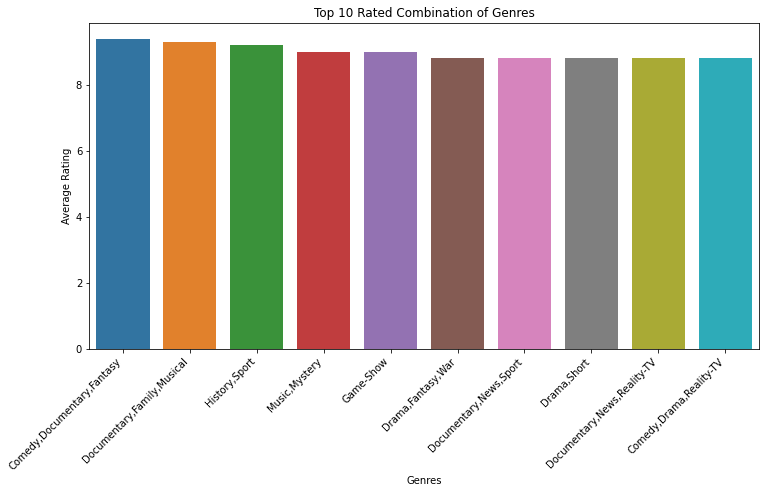

In [68]:
#top 10 rated combinations of genres
combo_inner_merge['averagerating'] = pd.to_numeric(combo_inner_merge['averagerating'], errors='coerce')
combo_mean_df = combo_inner_merge.groupby('genres')['averagerating'].mean().reset_index().sort_values(by='averagerating', ascending=False)
combo_top10_rating = combo_mean_df.nlargest(10, 'averagerating')
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=combo_top10_rating)
combo_formatted_ratings = ['{:.2f}'.format(rating) for rating in combo_top10_rating['averagerating']]
combo_top10_rating['averagerating'] = combo_formatted_ratings
#plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 10 Rated Combination of Genres')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Average Rating')

In [69]:
bv_movies=gross_df[gross_df['studio']=='BV']
bv_movie_titles = bv_movies['title']
bv_movie_titles

0                               Toy Story 3
1                Alice in Wonderland (2010)
7                                   Tangled
13                              Tron Legacy
15      Prince of Persia: The Sands of Time
                       ...                 
3101                Solo: A Star Wars Story
3107                   Mary Poppins Returns
3120             Disney's Christopher Robin
3122     The Nutcracker and the Four Realms
3129                      A Wrinkle in Time
Name: title, Length: 106, dtype: object

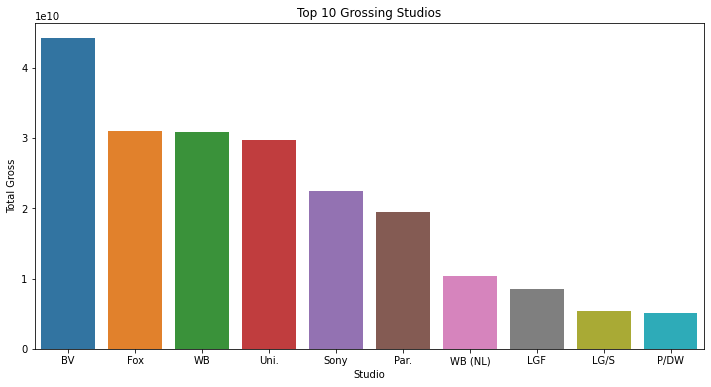

In [70]:
gross_df.head()
gross_df['foreign_gross'] = gross_df['foreign_gross'].astype(str)
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',', '').astype(float)
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']
cleaned_gross_df = gross_df.dropna()
grouped_gross_df=cleaned_gross_df.groupby('studio')['total_gross'].sum().reset_index().sort_values(by='total_gross', ascending=False)
top10_std = grouped_gross_df.nlargest(10, 'total_gross')
plt.figure(figsize=(12, 6))
sns.barplot(x='studio', y='total_gross', data=top10_std)
tick_positions = range(len(top10_std))
tick_labels = ['${:.2f}B'.format(val / 1e9) for val in top10_std['total_gross']]

#plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 10 Grossing Studios')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.show()

In [71]:
top10_std.sort_values(by='total_gross')

,studio,total_gross
116,P/DW,5.076500e+09
88,LG/S,5.318924e+09
89,LGF,8.467471e+09
164,WB (NL),1.031410e+10
126,Par.,1.944420e+10
142,Sony,2.240472e+10
155,Uni.,2.974681e+10
163,WB,3.079150e+10
57,Fox,3.098037e+10
22,BV,4.419038e+10


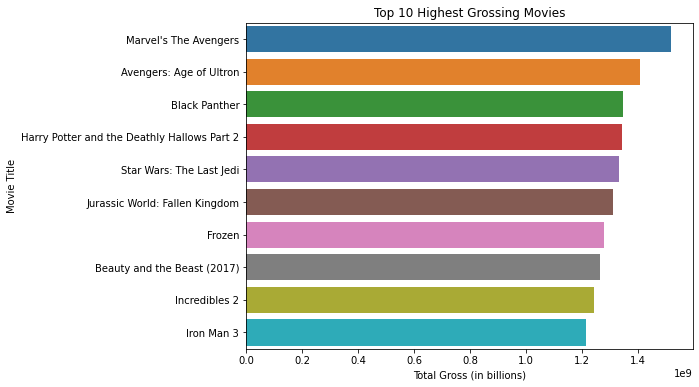

In [72]:
gross_df.sort_values(by='total_gross', ascending=False, inplace=True)
top_10_grossed_movies = gross_df.head(10)
top_10_grossed_movies
#plt.gca().invert_yaxis()  # Invert y-axis to show the highest-grossing movie at the top
plt.figure(figsize=(8, 6))
# Add labels on top of each bar
#for index, row in top10_grouped_genres.iterrows():
    #plt.text(index, row['total_gross'], f'${row["total_gross"]:.0f}', ha='right', va='center',rotation=45)
sns.barplot(x='total_gross', y='title', data=top_10_grossed_movies)
#plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 10 Highest Grossing Movies')
plt.xlabel('Total Gross (in billions)')
plt.ylabel('Movie Title')
plt.show()


In [73]:
#basics_df.rename(columns={'primary_title': 'title'}, inplace=True)
splitted_basics_df.rename(columns={'primary_title': 'title'}, inplace=True)
bv_movie_titles_df = pd.DataFrame({'title': bv_movie_titles})
required_merge = bv_movie_titles_df.merge(splitted_basics_df, on='title', how='left')
bv_movie_genres = required_merge[['title', 'genres']]
print(bv_movie_genres)

                                  title     genres
0                           Toy Story 3  Adventure
1                           Toy Story 3  Animation
2                           Toy Story 3     Comedy
3            Alice in Wonderland (2010)        NaN
4                               Tangled  Adventure
..                                  ...        ...
274  The Nutcracker and the Four Realms     Family
275  The Nutcracker and the Four Realms    Fantasy
276                   A Wrinkle in Time  Adventure
277                   A Wrinkle in Time     Family
278                   A Wrinkle in Time    Fantasy

[279 rows x 2 columns]


In [74]:
top_10_grossed_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [75]:
top_10_grossed_movies_title=top_10_grossed_movies['title']
top_10_grossed_movies_df = pd.DataFrame({'title': top_10_grossed_movies_title})
required_grossmerge = top_10_grossed_movies_df.merge(splitted_basics_df, on='title', how='left')
top_10_grossed_movies_genres = required_grossmerge[['title', 'genres']]
print(top_10_grossed_movies_genres)

                                          title     genres
0                         Marvel's The Avengers        NaN
1                       Avengers: Age of Ultron     Action
2                       Avengers: Age of Ultron  Adventure
3                       Avengers: Age of Ultron     Sci-Fi
4                                 Black Panther     Action
5                                 Black Panther  Adventure
6                                 Black Panther     Sci-Fi
7   Harry Potter and the Deathly Hallows Part 2        NaN
8                      Star Wars: The Last Jedi     Action
9                      Star Wars: The Last Jedi  Adventure
10                     Star Wars: The Last Jedi    Fantasy
11               Jurassic World: Fallen Kingdom     Action
12               Jurassic World: Fallen Kingdom  Adventure
13               Jurassic World: Fallen Kingdom     Sci-Fi
14                                       Frozen  Adventure
15                                       Frozen      Dra

In [76]:
bv_movie_genres_df=pd.DataFrame(bv_movie_genres)
bv_movie_genres_df.isnull().sum()
bv_movie_genres_df.dropna()
top_15_genres=bv_movie_genres_df['genres'].value_counts()
top_15_genres.head(15)

Adventure      57
Comedy         38
Action         30
Animation      25
Drama          24
Family         19
Fantasy        13
Biography      10
Sci-Fi          9
Documentary     9
History         6
Romance         5
Sport           4
Thriller        3
Crime           3
Name: genres, dtype: int64

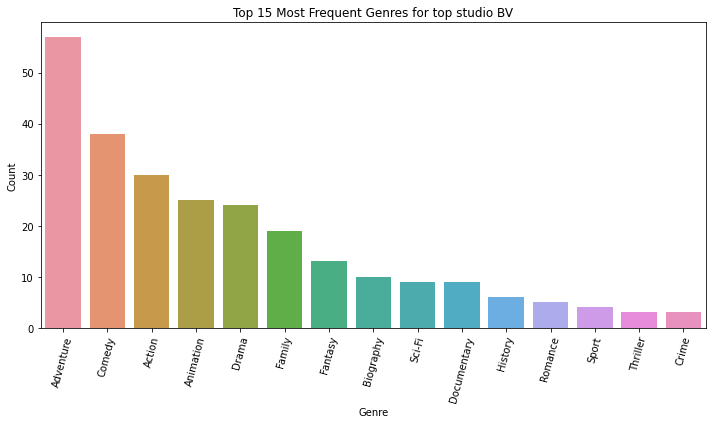

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_genres.head(15).index, y=top_15_genres.head(15).values)
plt.title('Top 15 Most Frequent Genres for top studio BV')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [78]:
genre_counts = bv_movie_genres['genres'].value_counts()
most_frequent_genre = genre_counts.idxmax()
frequency_of_most_frequent_genre = genre_counts.max()
print(f"The most frequent genre is '{most_frequent_genre}' with {frequency_of_most_frequent_genre} occurrences.")

The most frequent genre is 'Adventure' with 57 occurrences.


In [79]:
splitted_basics_df.rename(columns={'primary_title': 'title'}, inplace=True)
basics_df.rename(columns={'primary_title': 'title'}, inplace=True)
df14 = gross_df.merge(splitted_basics_df, left_on='title', right_on='title', how='inner')
combo_df14 = gross_df.merge(basics_df, left_on='title', right_on='title', how='inner')
# Select the desired columns: 'title', 'total_gross', and 'genres'
result_df14 = df14[['title', 'total_gross', 'genres']]
combo_result_df14 = combo_df14[['title', 'total_gross', 'genres']]
# Display the resulting DataFrame
print(result_df14)
print(combo_result_df14)

                        title   total_gross     genres
0     Avengers: Age of Ultron  1.405400e+09     Action
1     Avengers: Age of Ultron  1.405400e+09  Adventure
2     Avengers: Age of Ultron  1.405400e+09     Sci-Fi
3               Black Panther  1.347000e+09     Action
4               Black Panther  1.347000e+09  Adventure
...                       ...           ...        ...
7244      Beauty and the Dogs           NaN   Thriller
7245                The Quake           NaN     Action
7246                The Quake           NaN      Drama
7247                The Quake           NaN   Thriller
7248        An Actor Prepares           NaN     Comedy

[7249 rows x 3 columns]
                               title   total_gross                    genres
0            Avengers: Age of Ultron  1.405400e+09   Action,Adventure,Sci-Fi
1                      Black Panther  1.347000e+09   Action,Adventure,Sci-Fi
2           Star Wars: The Last Jedi  1.332600e+09  Action,Adventure,Fantasy
3     J

In [80]:
result_df14.dropna()

combo_result_df14.dropna()

,title,total_gross,genres
0,Avengers: Age of Ultron,1.405400e+09,"Action,Adventure,Sci-Fi"
1,Black Panther,1.347000e+09,"Action,Adventure,Sci-Fi"
2,Star Wars: The Last Jedi,1.332600e+09,"Action,Adventure,Fantasy"
3,Jurassic World: Fallen Kingdom,1.309500e+09,"Action,Adventure,Sci-Fi"
4,Frozen,1.276400e+09,"Adventure,Drama,Sport"
...,...,...,...
2016,Aurora,1.080000e+04,Horror
2017,Aurora,1.080000e+04,"Biography,Documentary,Drama"
2018,Aurora,1.080000e+04,Drama
2019,Aurora,1.080000e+04,"Comedy,Drama,Romance"


In [81]:
grouped_genres=result_df14.groupby('genres')['total_gross'].sum()
grouped_genres = grouped_genres.sort_values(ascending=False)
top10_grouped_genres=grouped_genres.head(10)
top10_grouped_genres

genres
Adventure    1.197933e+11
Action       1.060587e+11
Comedy       7.739542e+10
Drama        6.819596e+10
Animation    3.892383e+10
Sci-Fi       3.862852e+10
Thriller     3.457350e+10
Fantasy      2.757431e+10
Crime        1.888102e+10
Romance      1.600423e+10
Name: total_gross, dtype: float64

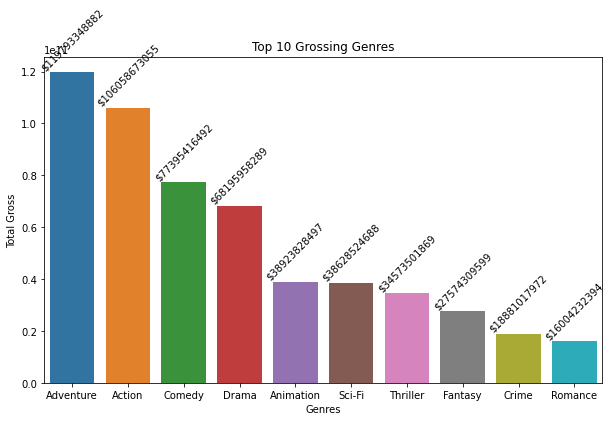

In [82]:
top10_grouped_genres = top10_grouped_genres.reset_index()

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
# - 'x' specifies the data for the x-axis ('genres' column)
# - 'y' specifies the data for the y-axis ('total_gross' column)
# - 'data' specifies the DataFrame
# - 'hue' is used to differentiate the bars based on the 'total_gross' column
# - 'dodge=False' ensures that bars for different 'total_gross' values are not dodged
sns.barplot(x='genres', y='total_gross', data=top10_grouped_genres)

# Add labels on top of each bar
for index, row in top10_grouped_genres.iterrows():
    plt.text(index, row['total_gross'], f'${row["total_gross"]:.0f}', ha='center', va='bottom',rotation=45)

# Set the title, xlabel, and ylabel for the plot
plt.title('Top 10 Grossing Genres')
plt.xlabel('Genres')
plt.ylabel('Total Gross')

# Show the plot
plt.show()

In [83]:
combo_grouped_genres=combo_result_df14.groupby('genres')['total_gross'].sum()
combo_grouped_genres = combo_grouped_genres.sort_values(ascending=False)
combo_top10_grouped_genres=combo_grouped_genres.head(10)
combo_top10_grouped_genres

genres
Action,Adventure,Sci-Fi       2.763390e+10
Adventure,Animation,Comedy    2.758054e+10
Action,Adventure,Fantasy      1.331489e+10
Action,Adventure,Comedy       9.665114e+09
Drama                         9.370934e+09
Action,Adventure,Thriller     6.599400e+09
Documentary                   6.532075e+09
Action,Adventure,Animation    6.438115e+09
Comedy                        5.460020e+09
Action,Adventure,Drama        5.357543e+09
Name: total_gross, dtype: float64

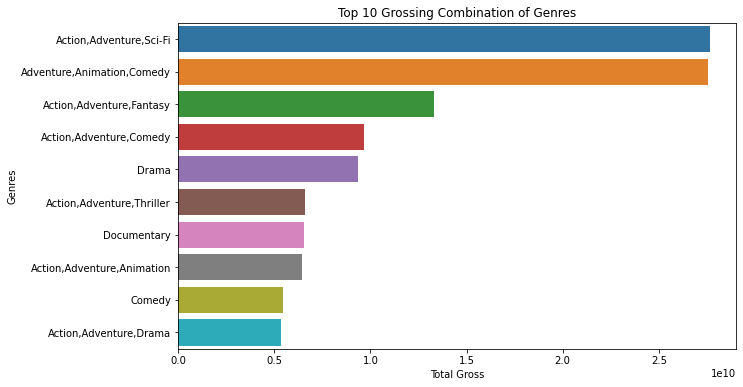

In [85]:
combo_top10_grouped_genres = combo_top10_grouped_genres.reset_index()
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
# - 'x' specifies the data for the x-axis ('genres' column)
# - 'y' specifies the data for the y-axis ('total_gross' column)
# - 'data' specifies the DataFrame
# - 'hue' is used to differentiate the bars based on the 'total_gross' column
# - 'dodge=False' ensures that bars for different 'total_gross' values are not dodged
#sns.barplot(x='genres', y='total_gross', data=combo_top10_grouped_genres)
sns.barplot(x='total_gross', y='genres', data=combo_top10_grouped_genres)
# Add labels on top of each bar
#for index, row in combo_top10_grouped_genres.iterrows():
    #plt.text(index, row['total_gross'], f'${row["total_gross"]:.0f}', ha='center', va='bottom',rotation=45)

# Set the title, xlabel, and ylabel for the plot
plt.title('Top 10 Grossing Combination of Genres')
plt.ylabel('Genres')
plt.xlabel('Total Gross')
#plt.xticks(ha='center',rotation=75)
# Show the plot

plt.show()

In [86]:
year_df = splitted_basics_df.merge(budgets_df, left_on='title', right_on='movie', how='inner')

# Extract year from release_date column and convert it to integer
year_df['release_year'] = pd.to_datetime(year_df['release_date']).dt.year.astype(int)
year_df['worldwide_gross'] = year_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [87]:
result_year_df=year_df[['genres','worldwide_gross','release_year']]

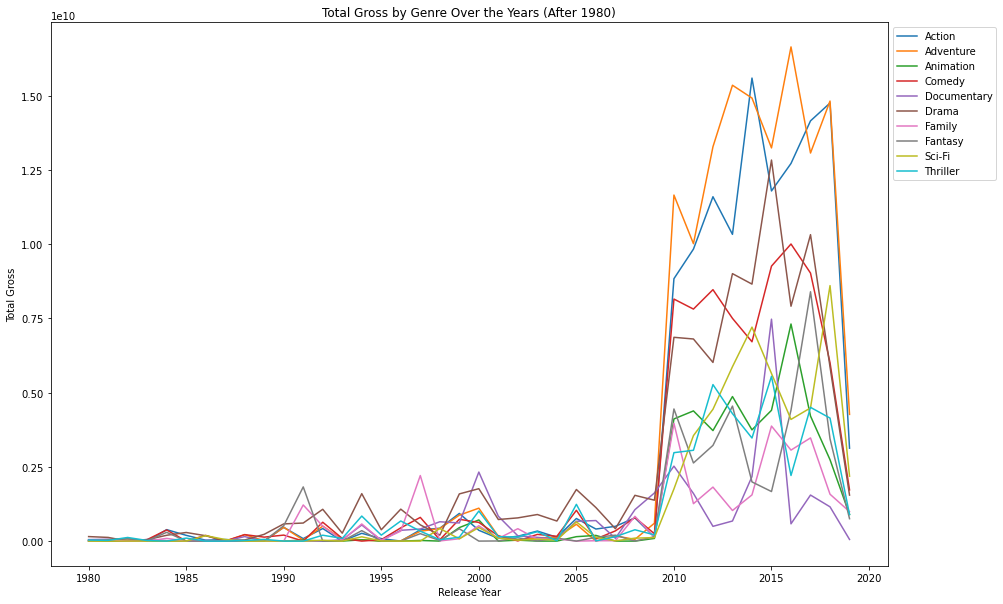

In [88]:
# Filter data for years after 1980
df_filtered = result_year_df[result_year_df['release_year'] >= 1980]

# Group by genre and calculate total gross
genre_total_gross = df_filtered.groupby('genres')['worldwide_gross'].sum()

# Select the top 10 genres by total gross
top_10_genres = genre_total_gross.nlargest(10)

# Filter the original DataFrame to include only the top 10 genres
df_filtered = df_filtered[df_filtered['genres'].isin(top_10_genres.index)]

# Pivot the DataFrame for plotting
genre_yearly_gross = df_filtered.groupby(['genres', 'release_year'])['worldwide_gross'].sum().unstack().fillna(0)

# Transpose the DataFrame so that years are on the y-axis
genre_yearly_gross = genre_yearly_gross.T

# Set a larger figure size (adjust the numbers as needed)
plt.figure(figsize=(15, 10))

# Create a line chart for each genre
for genre in genre_yearly_gross.columns:
    plt.plot(genre_yearly_gross.index, genre_yearly_gross[genre], label=genre)

# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('Total Gross')
plt.title('Total Gross by Genre Over the Years (After 1980)')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

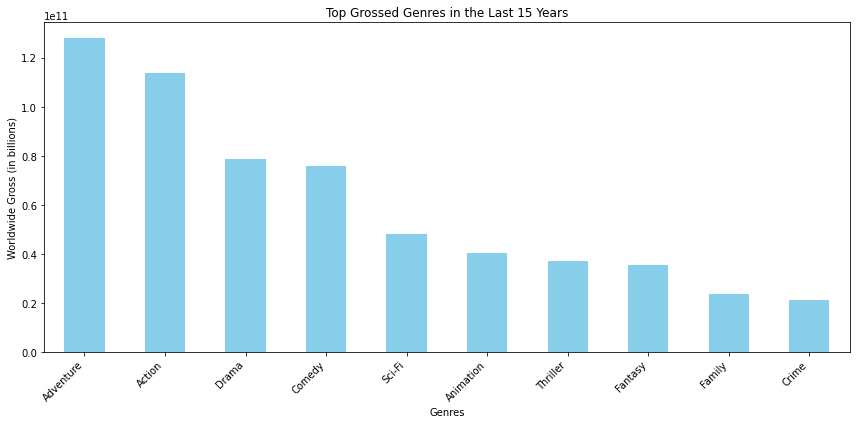

In [89]:
current_year = 2023
last_15_years_df = result_year_df[result_year_df['release_year'] >= (current_year - 15)]

# Group by genres and sum the worldwide gross
genre_gross = last_15_years_df.groupby('genres')['worldwide_gross'].sum()

# Sort genres by total gross in descending order
top_grossed_genres = genre_gross.sort_values(ascending=False).head(10)  # Change the number if you want more or fewer genres

# Create a bar plot
plt.figure(figsize=(12, 6))
top_grossed_genres.plot(kind='bar', color='skyblue')
plt.title('Top Grossed Genres in the Last 15 Years')
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross (in billions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

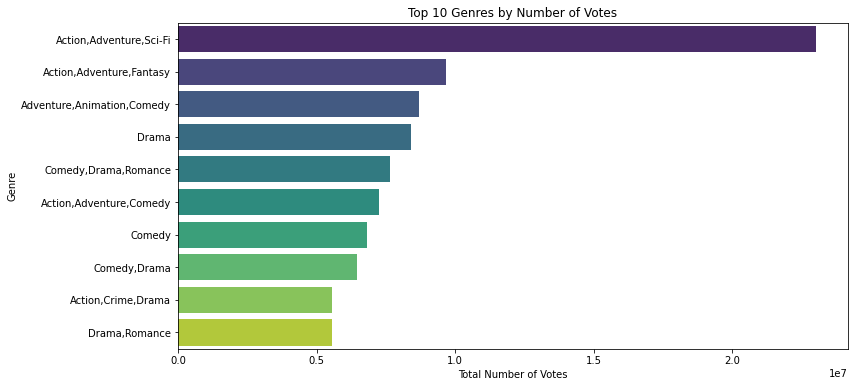

In [90]:
numvote_df = basics_df.merge(rating_df, on='tconst', how='inner')

# Group by genre and sum the 'numvotes' column
genre_votes = numvote_df.groupby('genres')['numvotes'].sum().reset_index()

# Sort by total numvotes in descending order and select the top 10 genres
top_10_genres = genre_votes.sort_values(by='numvotes', ascending=False).head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_genres, x='numvotes', y='genres', palette='viridis')
plt.xlabel('Total Number of Votes')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Number of Votes')

# Show the plot
plt.show()

## Conclusions
This analysis leads to three recommendations regarding types of movies that are successful:-

Movies with the genre combination Action, Adventure & Sci-Fi topped the leaderboard in both Domestic and Foreign Gross Sales as well as hightest number of votes this combination is obviously a hit at the box office worldwide, make this the first type of movie to produce for success. Movies with Adventure, Animation and Comedy were the next most successful in top rated movies, use this combination as the next or alternative type of movie to produce. Movies in the top 20 recent years yielded slighly different results but Action, Adventure and Sci-Fi combination did come out 1st still. Adventure genre seems constant in all the above graphs so must be a key element of any movie to be produced. Questions to consider:

Limitations-Could the same movie be classified into different genres by different audiences? Who classifies the genres for each movie? Can the classification of genres be improved to provide a more benchmark approach? Future analysis could include the movie classification ie PG, MA etc to see which audience the most successful movies were made for.